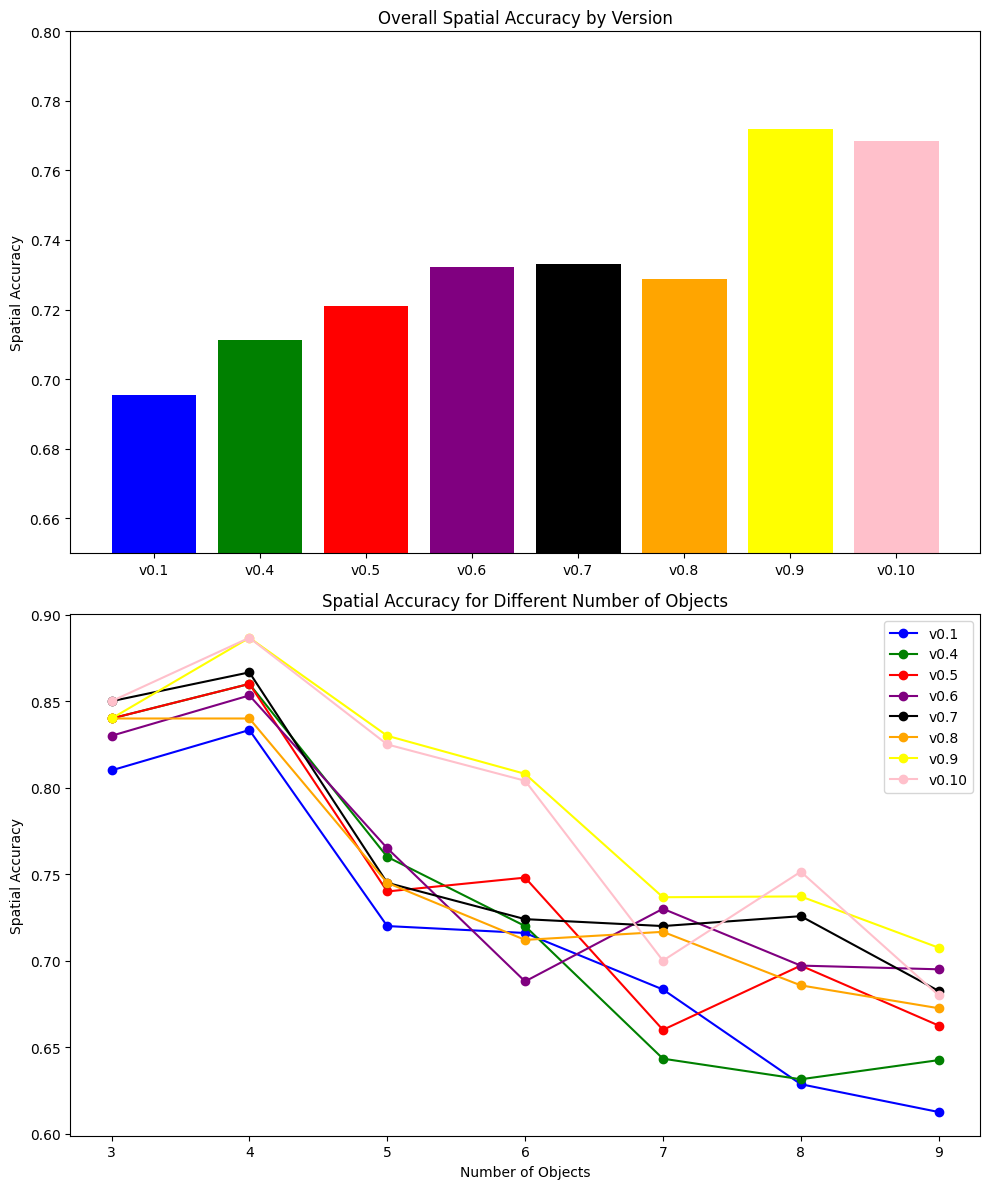

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Data
versions = [f'v0.{i}' for i in [1, 4, 5, 6, 7, 8, 9, 10]]
data = {}
for version in versions:
    cur_version_data = json.load(open(f'results/spatial_results_{version}.json'))
    data[version] = cur_version_data

overall_spatial_accuracy = [d['overall'] for d in data.values()]
objects_count = np.arange(3, 10)

# Spatial Accuracy for different object counts
spatial_accuracy = {
    version: [i for i in d.values()][1:]
    for version, d in data.items()
}

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Overall Spatial Accuracy Bar Plot
ax[0].bar(versions, overall_spatial_accuracy, color=['blue', 'green', 'red', 'purple', 'black', 'orange', 'yellow', 'pink'])
ax[0].set_title('Overall Spatial Accuracy by Version')
ax[0].set_ylabel('Spatial Accuracy')
ax[0].set_ylim(0.65, 0.8)

# Spatial Accuracy by Number of Objects Line Plot
colors = ['blue', 'green', 'red', 'purple', 'black', 'orange', 'yellow', 'pink']
for i, version in enumerate(versions):
    # print(version)
    ax[1].plot(objects_count, spatial_accuracy[version], '-o', label=version, color=colors[i])

ax[1].set_title('Spatial Accuracy for Different Number of Objects')
ax[1].set_xlabel('Number of Objects')
ax[1].set_ylabel('Spatial Accuracy')
ax[1].legend()

plt.tight_layout()
plt.show()
